In [47]:
import ipywidgets as widgets
from ipywidgets import Checkbox, VBox, HBox
import vaex
import vaex.jupyter
import numpy as np
import pylab as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


#Enumerations
READ_HIT = b'R'
READ_MISS = b'S'
WRITE_HIT = b'W'
WRITE_MISS = b'X'


df = vaex.open("../hdf5_pinIO/test9/mill_access.h5")
df['index'] = np.arange(0, df.ADDRESS.count())

#Set up name-tag mapping
namesFromFile = ["Hardcoded Tag 1", "2"]
tagsFromFile = np.unique(df.tag.values).tolist()
numTags = len(namesFromFile)



#Define all selections here
df.select(True, name='structures')
df.select(True, name='rw')
df.select(True, name='hm')
df.select(True, name='total')


#Initialize selections
for tag in tagsFromFile:
    df.select(df.tag == tag, mode='or')

    
#Handle all boolean combinations of independent checkboxes here
def combineSelections():
    df.select("structures", mode='replace', name='total')
    df.select("rw", mode='and', name='total')
    df.select("hm", mode='and', name='total')
    
    
    
def updateGraph(change):
    if(change.name == 'value'):
        
        name = change.owner.description
        tag = tagsFromFile[namesFromFile.index(name)]

        if(change.new == True):
            df.select(df.tag == tag, mode='or', name='structures')
            combineSelections()
        else:
            df.select(df.tag == tag, mode='subtract', name='structures')
            combineSelections()
    df.select('total')
        
        
        
def updateReadWrite(change):
    if(change.name == 'value'):
        
        name = change.owner.description
        
        if(name == "Reads"):
            targetHit = READ_HIT
            targetMiss = READ_MISS
        else:
            targetHit = WRITE_HIT
            targetMiss = WRITE_MISS
        
        if(change.new == True):
            df.select(df.WRITE == targetHit, mode='or', name='rw')
            df.select(df.WRITE == targetMiss, mode='or', name='rw')
            combineSelections()
        else:
            df.select(df.WRITE == targetHit, mode='subtract', name='rw')
            df.select(df.WRITE == targetMiss, mode='subtract', name='rw')
            combineSelections()
    df.select('total')
            
        
            
            
def updateHitMiss(change):
    if(change.name == 'value'):
        
        name = change.owner.description
        
        if(name == "Hits"):
            targetRead = READ_HIT
            targetWrite = WRITE_HIT
        else:
            targetRead = READ_MISS
            targetWrite = WRITE_MISS
        
        if(change.new == True):
            df.select(df.WRITE == targetRead, mode='or', name='hm')
            df.select(df.WRITE == targetWrite, mode='or', name='hm')
            combineSelections()
        else:
            df.select(df.WRITE == targetRead, mode='subtract', name='hm')
            df.select(df.WRITE == targetWrite, mode='subtract', name='hm')
            combineSelections()
    df.select('total')
        

        
        
tagButtons = [Checkbox(description=name, value=True, disabled=False, indent=False) for name in namesFromFile]

rwButtons = [Checkbox(description="Reads", value=True, disabled=False, indent=False),
             Checkbox(description="Writes", value=True, disabled=False, indent=False)]

hmButtons = [Checkbox(description="Hits", value=True, disabled=False, indent=False),
             Checkbox(description="Misses", value=True, disabled=False, indent=False)]
    
    
for i in range(numTags):
    tagButtons[i].observe(updateGraph)
    
for button in rwButtons:
    button.observe(updateReadWrite)
    
for button in hmButtons:
    button.observe(updateHitMiss)
    
checks = HBox([VBox(tagButtons), VBox(rwButtons), VBox(hmButtons)])

df.plot_widget(df.index, df.ADDRESS, selection=[True], backend='bqplot', tool_select=True)


display(checks)

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

In [60]:
import ipywidgets as widgets
import inspect
from ipywidgets import Checkbox, VBox
import vaex
import vaex.jupyter
import numpy as np
import pylab as plt



df = vaex.open("../hdf5_pinIO/test9/mill_access.h5")
df['index'] = np.arange(0, df.ADDRESS.count())
np.unique(df.tag.values).tolist()
arr = np.unique(df.WRITE.values).tolist()
df[:200010]
#df.plot_widget(df.tag, df.ADDRESS, selection=[True], backend='bqplot', tool_select=True)



#,ADDRESS,WRITE,tag,index
<i style='opacity: 0.6'>0</i>,139913535561744,b'S',0,0
<i style='opacity: 0.6'>1</i>,139913535561744,b'W',0,1
<i style='opacity: 0.6'>2</i>,139913535561748,b'S',0,2
<i style='opacity: 0.6'>3</i>,139913535561748,b'W',0,3
<i style='opacity: 0.6'>4</i>,139913535561752,b'S',0,4
...,...,...,...,...
"<i style='opacity: 0.6'>200,005</i>",139913535561748,b'W',0,200005
"<i style='opacity: 0.6'>200,006</i>",139913535561752,b'S',0,200006
"<i style='opacity: 0.6'>200,007</i>",139913535561752,b'W',0,200007
"<i style='opacity: 0.6'>200,008</i>",139913535561756,b'S',0,200008


In [62]:
import subprocess
args = ["../pintool/pin","-t", "../pintool/source/tools/ManualExamples/obj-intel64/inscount0.so", "-o","inscount0.log","--","/bin/ls"]
completed = subprocess.run(args,capture_output=True)
print(completed.stdout.decode('utf-8'))
completed = subprocess.run(["wc", "inscount0.log"], capture_output=True)
print(completed.stdout.decode('utf-8'))

inscount0.log
Selectors.ipynb
testdata.csv
testdata.csv.hdf5
test.py
testtags.csv

 1  2 13 inscount0.log



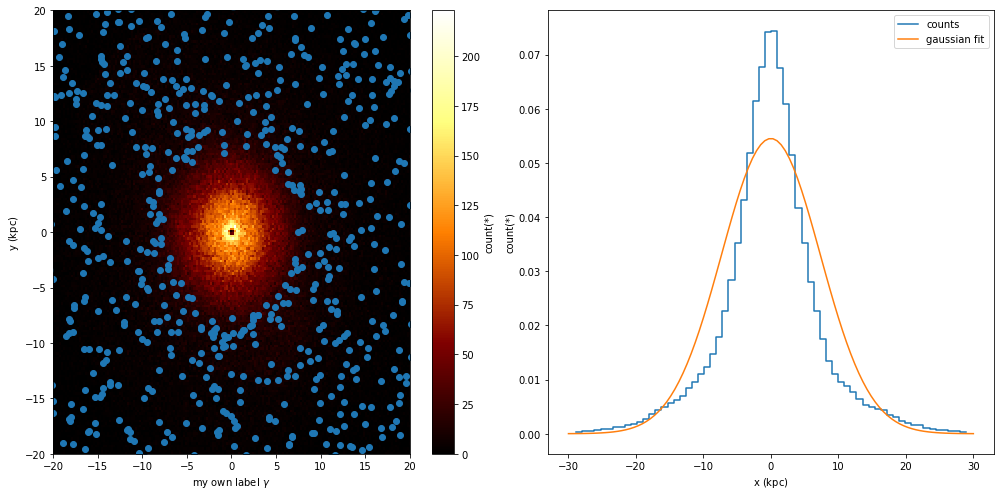